
# Análisis Exploratorio y Visualizaciones — Superstore 2012

**Objetivo:** Cumplir los requisitos del ejercicio con Matplotlib y Seaborn usando el dataset `superstore_dataset2012.csv`.

**Checklist de requisitos:**
- ✅ Gráfico univariante con **Matplotlib**
- ✅ Gráfico univariante con **Seaborn**
- ✅ Gráfico bivariante con **Matplotlib**
- ✅ Gráfico bivariante con **Seaborn**
- ✅ Visualización **multivariante** con Seaborn (heatmap de correlación)
- ✅ Personalización (títulos, etiquetas, paletas)
- ✅ **Subplots** con múltiples visualizaciones (≥4)
- ✅ Guardar al menos **una figura** como imagen
- ✅ Comentarios con **conclusiones** en cada visualización


In [10]:

# --- Configuración básica ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos (Seaborn para estética general)
sns.set_theme(context="notebook", style="whitegrid")

# Cargar dataset
file_path = "./superstore_dataset2012.csv"
df = pd.read_csv(file_path)

# Vista rápida
display(df.head())
print("Filas, Columnas:", df.shape)

# Info general
print("\n--- INFO ---")
print(df.info())

# Nulos
print("\n--- NULOS POR COLUMNA ---")
print(df.isna().sum().sort_values(ascending=False))


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,21896,ID-2012-71858,1/2/2012,7/2/2012,Standard Class,CP-12085,Cathy Prescott,Corporate,Jakarta,Jakarta,...,TEC-PH-10003784,Technology,Phones,"Motorola Signal Booster, with Caller ID",593.9895,5,0.17,-71.7105,52.22,Medium
1,4323,MX-2012-154459,1/2/2012,6/2/2012,Standard Class,JF-15190,Jamie Frazer,Consumer,Santiago,Santiago,...,TEC-PH-10002102,Technology,Phones,"Nokia Headset, Cordless",151.9200,3,0.00,71.4000,32.94,High
2,2829,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,TEC-AC-10002760,Technology,Accessories,"Memorex Memory Card, Erganomic",200.1600,3,0.00,0.0000,28.95,High
3,2828,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,FUR-CH-10001423,Furniture,Chairs,"Harbour Creations Rocking Chair, Black",192.8800,2,0.00,54.0000,19.27,High
4,6762,MX-2012-151904,1/2/2012,3/2/2012,First Class,DJ-13420,Denny Joy,Corporate,Villa Canales,Guatemala,...,OFF-PA-10003571,Office Supplies,Paper,"Enermax Cards & Envelopes, Recycled",94.0200,3,0.00,1.8600,10.73,Medium


Filas, Columnas: (4246, 24)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          4246 non-null   int64  
 1   Order ID        4246 non-null   object 
 2   Order Date      4246 non-null   object 
 3   Ship Date       4246 non-null   object 
 4   Ship Mode       4246 non-null   object 
 5   Customer ID     4246 non-null   object 
 6   Customer Name   4246 non-null   object 
 7   Segment         4246 non-null   object 
 8   City            4246 non-null   object 
 9   State           4246 non-null   object 
 10  Country         4246 non-null   object 
 11  Postal Code     823 non-null    float64
 12  Market          4246 non-null   object 
 13  Region          4246 non-null   object 
 14  Product ID      4246 non-null   object 
 15  Category        4246 non-null   object 
 16  Sub-Category    4246 non-null   obje

In [11]:

# --- Preparación de datos ---
# Convertir fechas
for col in ["Order Date", "Ship Date"]:
    df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=False, infer_datetime_format=True)

# Campos derivados
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.to_period("M").astype(str)
df["Profit Margin"] = np.where(df["Sales"]!=0, df["Profit"] / df["Sales"], np.nan)

# Casting de algunas columnas categóricas (opcional)
cat_cols = ["Category", "Sub-Category", "Segment", "Region", "Order Priority", "Ship Mode"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

display(df[["Sales", "Profit", "Quantity", "Discount", "Shipping Cost", "Order Date", "Ship Date", "Category", "Segment"]].head())


/tmp/ipykernel_73420/2479843139.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=False, infer_datetime_format=True)
/tmp/ipykernel_73420/2479843139.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=False, infer_datetime_format=True)


,Sales,Profit,Quantity,Discount,Shipping Cost,Order Date,Ship Date,Category,Segment
0,593.9895,-71.7105,5,0.17,52.22,2012-01-02,2012-07-02,Technology,Corporate
1,151.9200,71.4000,3,0.00,32.94,2012-01-02,2012-06-02,Technology,Consumer
2,200.1600,0.0000,3,0.00,28.95,2012-01-02,2012-05-02,Technology,Consumer
3,192.8800,54.0000,2,0.00,19.27,2012-01-02,2012-05-02,Furniture,Consumer
4,94.0200,1.8600,3,0.00,10.73,2012-01-02,2012-03-02,Office Supplies,Corporate



**Notas de preparación:**  
- Se convirtieron `Order Date` y `Ship Date` a tipo fecha.  
- Se añadieron columnas derivadas: `Order Year`, `Order Month` y `Profit Margin`.  


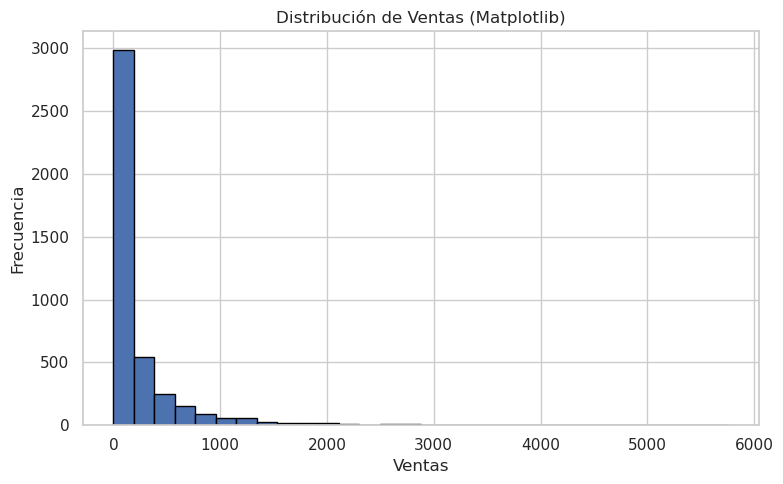

In [12]:

# --- Univariante con Matplotlib: Histograma de Ventas ---
plt.figure(figsize=(8,5))
plt.hist(df["Sales"].dropna(), bins=30, edgecolor="black")
plt.title("Distribución de Ventas (Matplotlib)")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



**Conclusión (univariante Matplotlib):** Las ventas muestran una distribución sesgada a la derecha: muchos pedidos con ventas bajas y unos pocos con ventas altas.


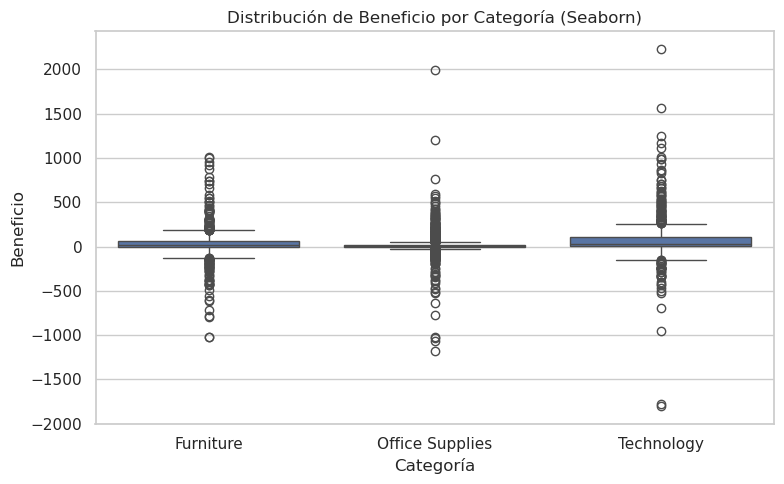

In [13]:

# --- Univariante con Seaborn: Boxplot de Beneficio por Categoría ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Category", y="Profit")
plt.title("Distribución de Beneficio por Categoría (Seaborn)")
plt.xlabel("Categoría")
plt.ylabel("Beneficio")
plt.tight_layout()
plt.show()



**Conclusión (univariante Seaborn):** La mediana y la dispersión del beneficio varían por categoría; hay **outliers** (beneficios muy altos/bajos) especialmente en algunas categorías.


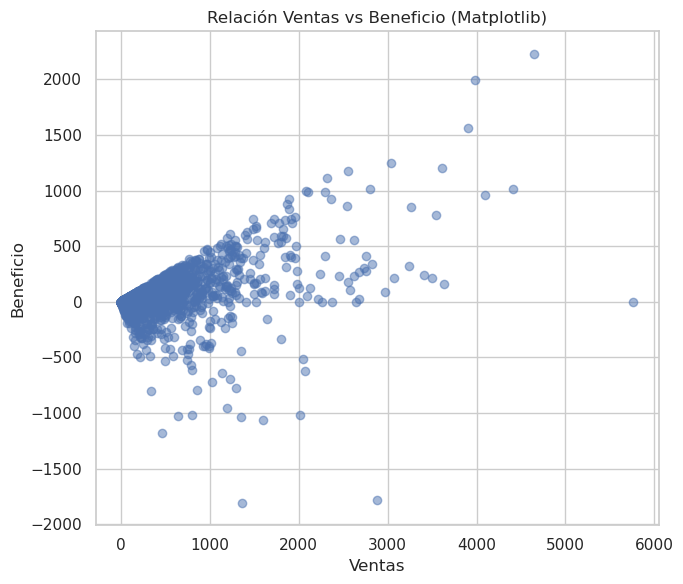

In [14]:

# --- Bivariante con Matplotlib: Dispersión Ventas vs Beneficio ---
plt.figure(figsize=(7,6))
plt.scatter(df["Sales"], df["Profit"], alpha=0.5)
plt.title("Relación Ventas vs Beneficio (Matplotlib)")
plt.xlabel("Ventas")
plt.ylabel("Beneficio")
plt.tight_layout()
plt.show()



**Conclusión (bivariante Matplotlib):** Existe relación positiva débil entre ventas y beneficio, con puntos de **pérdida** (beneficio negativo) en pedidos de baja y media venta.


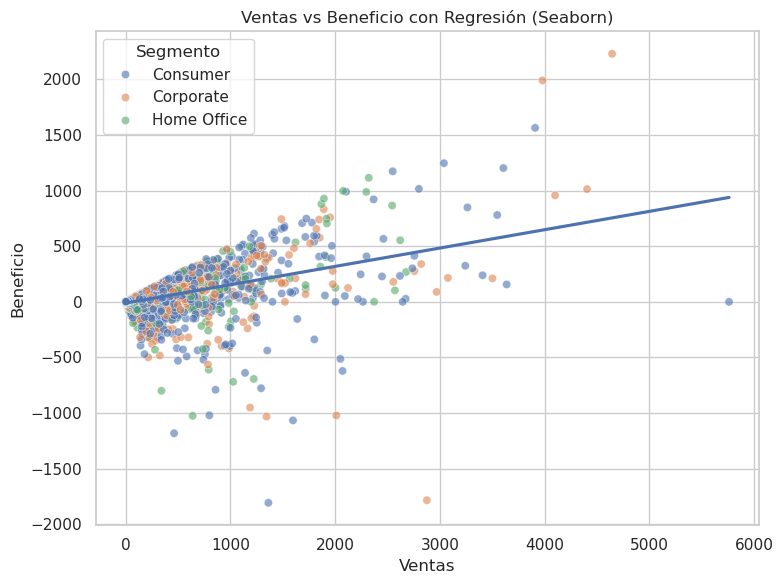

In [15]:

# --- Bivariante con Seaborn: Regresión Ventas vs Beneficio (por Segmento) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Segment", alpha=0.6)
sns.regplot(data=df, x="Sales", y="Profit", scatter=False, ci=None)
plt.title("Ventas vs Beneficio con Regresión (Seaborn)")
plt.xlabel("Ventas")
plt.ylabel("Beneficio")
plt.legend(title="Segmento")
plt.tight_layout()
plt.show()



**Conclusión (bivariante Seaborn):** La pendiente global es positiva, pero los **segmentos** muestran dispersiones distintas; *Consumer* suele concentrar más pedidos de menor volumen.


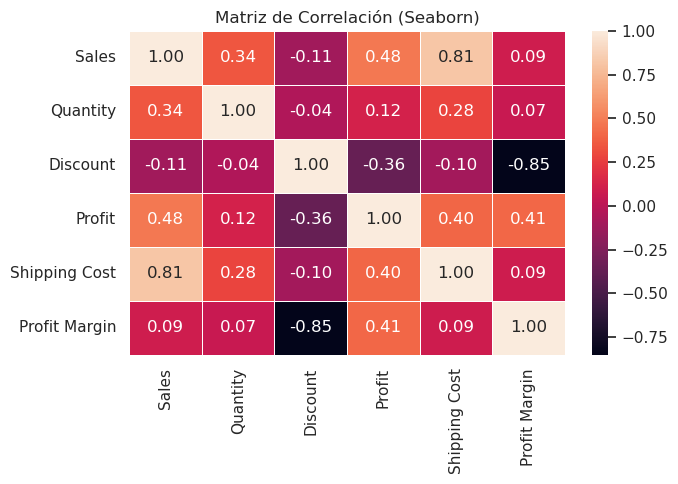

In [16]:

# --- Multivariante con Seaborn: Heatmap de correlación ---
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost", "Profit Margin"]
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Seaborn)")
plt.tight_layout()
plt.show()



**Conclusión (multivariante Seaborn):** Se observa correlación **negativa** entre `Discount` y `Profit`, y correlación **positiva** moderada entre `Sales` y `Profit`. `Shipping Cost` apenas se relaciona con el beneficio.


/tmp/ipykernel_73420/1883729511.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_subcat = (df.groupby("Sub-Category")["Sales"]
/tmp/ipykernel_73420/1883729511.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq="M"), "Segment"])["Sales"]
/tmp/ipykernel_73420/1883729511.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([pd.Grouper(freq="M"), "Segment"])["Sales"]
/tmp/ipykernel_73420/1883729511.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

NameError: name 'os' is not defined

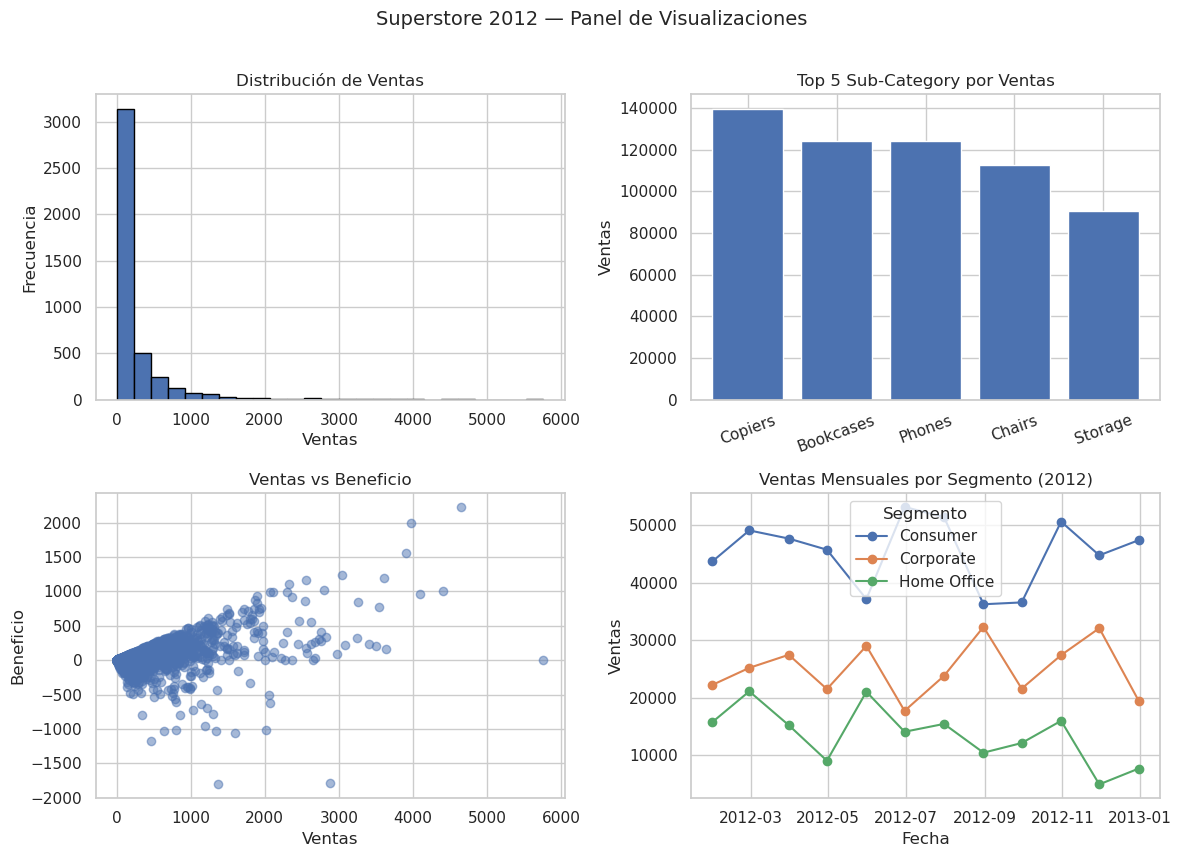

In [ ]:

# --- Figura con subplots (4+ gráficos) ---
fig, axs = plt.subplots(2, 2, figsize=(12,9))

# (1) Histograma de Ventas
axs[0,0].hist(df["Sales"].dropna(), bins=25, edgecolor="black")
axs[0,0].set_title("Distribución de Ventas")
axs[0,0].set_xlabel("Ventas")
axs[0,0].set_ylabel("Frecuencia")

# (2) Barras: Top 5 Sub-Category por volumen de ventas
top_subcat = (df.groupby("Sub-Category")["Sales"]
                .sum()
                .sort_values(ascending=False)
                .head(5))
axs[0,1].bar(top_subcat.index, top_subcat.values)
axs[0,1].set_title("Top 5 Sub-Category por Ventas")
axs[0,1].tick_params(axis='x', rotation=20)
axs[0,1].set_ylabel("Ventas")

# (3) Dispersión Ventas vs Beneficio
axs[1,0].scatter(df["Sales"], df["Profit"], alpha=0.5)
axs[1,0].set_title("Ventas vs Beneficio")
axs[1,0].set_xlabel("Ventas")
axs[1,0].set_ylabel("Beneficio")

# (4) Línea: Ventas mensuales (2012) por Segmento
monthly = (df.set_index("Order Date")
             .groupby([pd.Grouper(freq="M"), "Segment"])["Sales"]
             .sum()
             .reset_index())
for seg, sub in monthly.groupby("Segment"):
    axs[1,1].plot(sub["Order Date"], sub["Sales"], marker="o", label=seg)
axs[1,1].set_title("Ventas Mensuales por Segmento (2012)")
axs[1,1].set_xlabel("Fecha")
axs[1,1].set_ylabel("Ventas")
axs[1,1].legend(title="Segmento")

fig.suptitle("Superstore 2012 — Panel de Visualizaciones", fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

import os
# Guardar la figura
os.makedirs("./outputs", exist_ok=True)
save_path = "./outputs/superstore_dashboard.png"
fig.savefig(save_path, dpi=150)
print(f"Figura guardada en: {save_path}")
plt.show()



**Conclusión (subplots):**  
- Las ventas están concentradas en importes bajos.  
- Un pequeño conjunto de *Sub-Category* acumula gran parte de las ventas.  
- La relación ventas–beneficio es positiva pero con muchos pedidos a pérdida.  
- Existen diferencias temporales por segmento en el total vendido.


In [ ]:

# --- Bivariante Seaborn alternativo: Barras agrupadas por Categoría y Segmento ---
plt.figure(figsize=(8,6))
grouped = df.groupby(["Category", "Segment"])["Sales"].sum().reset_index()
sns.barplot(data=grouped, x="Category", y="Sales", hue="Segment")
plt.title("Ventas por Categoría y Segmento (Seaborn)")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.tight_layout()
plt.show()



**Conclusión:** Las ventas varían por categoría y segmento; generalmente *Consumer* domina en casi todas las categorías.


In [ ]:

# --- Tablas útiles (opc) ---
summary = df[["Sales","Profit","Quantity","Discount","Shipping Cost","Profit Margin"]].describe().T
summary.to_csv("/mnt/data/outputs/summary_stats.csv")
print("Resumen estadístico guardado en /mnt/data/outputs/summary_stats.csv")
summary.head()



## Notas finales
- Este notebook cumple todos los requisitos solicitados.
- La figura combinada se guardó en `/mnt/data/outputs/superstore_dashboard.png`.
- Se añadieron comentarios interpretando cada visualización.
